In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/drive/MyDrive/AIE/Churn_Modelling.csv')

In [3]:
# Business problem: - To find out whether cutomers will leave the same or not

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
## Missing value check
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
# conversion of categorical data
Geography = pd.get_dummies(data['Geography'],drop_first=True)
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [10]:
data=pd.concat([data,Geography,Gender],axis=1)

In [11]:
data.drop(['Geography','Gender'],axis=1,inplace=True)

In [12]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [13]:
Geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [14]:
## Creating independent and dependent variable.
X=data.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Male']]
y=data.loc[:,['Exited']]

In [15]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [20]:
# Training and tetsing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [22]:
X_train.shape

(8000, 11)

In [23]:
X_test.shape

(2000, 11)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [37]:
# Define the model
model=Sequential()

In [38]:
# Adding input layer to first hidden layer
model.add(Dense(units=11,input_dim=11,activation='relu',
                kernel_initializer='he_uniform')) # Fixed typo here


# Adding first hidden layer to second hidden layer
model.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform')) # Fixed typo: kernal_initializer -> kernel_initializer

# Adding second hidden layer to output layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))

# Adding third hidden layer to output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
X_train.shape

(8000, 11)

In [42]:
# fit the keras model on the dataset
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8655 - loss: 0.3127 - val_accuracy: 0.8508 - val_loss: 0.3664
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8710 - loss: 0.2986 - val_accuracy: 0.8459 - val_loss: 0.3693
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8699 - loss: 0.2896 - val_accuracy: 0.8504 - val_loss: 0.3629
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8701 - loss: 0.2984 - val_accuracy: 0.8482 - val_loss: 0.3729
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8734 - loss: 0.3003 - val_accuracy: 0.8565 - val_loss: 0.3611
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8720 - loss: 0.2991 - val_accuracy: 0.8512 - val_loss: 0.3626
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8649 - loss: 0.3102 - val_accuracy: 0.8474 - val_loss: 0.3669
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8654 - loss: 0.3060 - val_accu

In [45]:
...
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [46]:
...
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8692 - loss: 0.3593


[0.3869606852531433, 0.8535000085830688]

In [47]:
# list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [49]:
model_history.history

{'accuracy': [0.8701249957084656,
  0.8676992058753967,
  0.867326021194458,
  0.8680723905563354,
  0.8699384331703186,
  0.8699384331703186,
  0.8688188195228577,
  0.8660197854042053,
  0.8697518110275269,
  0.8732972741127014,
  0.8691920042037964,
  0.8712446093559265,
  0.8712446093559265,
  0.8695651888847351,
  0.8738570809364319,
  0.870684802532196,
  0.8703116178512573,
  0.870684802532196,
  0.8678858280181885,
  0.8703116178512573,
  0.871804416179657,
  0.8710580468177795,
  0.8712446093559265,
  0.8723642230033875,
  0.8734838366508484,
  0.8708714246749878,
  0.8697518110275269,
  0.8732972741127014,
  0.8712446093559265,
  0.8719910383224487,
  0.8744168877601624,
  0.8725508451461792,
  0.872737467288971,
  0.8701249957084656,
  0.871804416179657,
  0.8712446093559265,
  0.8714312314987183,
  0.8714312314987183,
  0.8704982399940491,
  0.8725508451461792,
  0.87161785364151,
  0.8708714246749878,
  0.8703116178512573,
  0.8742302656173706,
  0.872737467288971,
  0.871

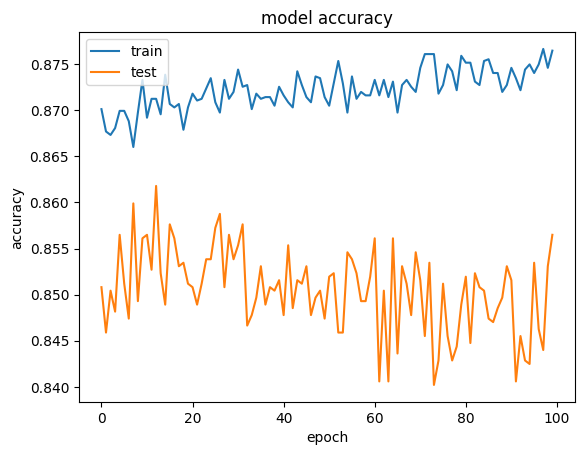

In [51]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

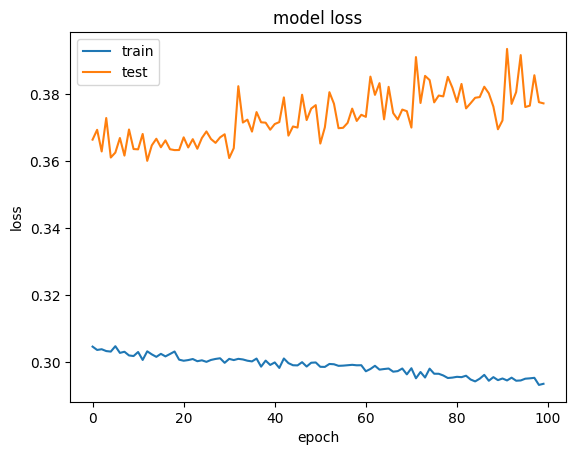

In [53]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1550,   73],
       [ 220,  157]])

In [56]:
# Calculating the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8535